# Carte mondiale des séismes de 2022

Ce notebook a pour objet la constitution d'une carte représentant l'ensemble des séismes d'une magnitude supérieure à 4,5 survenus en 2022. Le choix de prendre les séismes de magnitude supérieure à 4,5 a été fait pour ne considérer que les séismes les plus importants. On ignore donc ici une grande partie des tremblements de terre car beaucoup ont une magnitude inférieure à 4,5, voire ne sont même pas ressentis par l'homme (magnitude inférieure à 3).

Les données sont issues de l'US Geological Survey (https://www.usgs.gov/programs/earthquake-hazards/earthquakes, 2023). 

## 1. Importation des données

Le site de l'USGS limite le nombre de données téléchargeables en un seul fichier. Il a donc été nécessaire de télécharger deux fichiers pour obtenir l'ensemble des séismes. La première étape du travail est donc d'importer les deux fichiers puis de les concaténer. Pour cela, nous allons utiliser le module geopandas.

In [1]:
import geopandas as gpd
import pandas as pd

df_seismes1 = gpd.read_file('seismes01-06.geojson')
df_seismes2 = gpd.read_file('seismes07-12.geojson')
display(df_seismes1.info())
display(df_seismes2.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3947 entries, 0 to 3946
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        3947 non-null   object  
 1   mag       3947 non-null   float64 
 2   place     3875 non-null   object  
 3   time      3947 non-null   int64   
 4   updated   3947 non-null   int64   
 5   tz        0 non-null      object  
 6   url       3947 non-null   object  
 7   detail    3947 non-null   object  
 8   felt      777 non-null    float64 
 9   cdi       777 non-null    float64 
 10  mmi       413 non-null    float64 
 11  alert     351 non-null    object  
 12  status    3947 non-null   object  
 13  tsunami   3947 non-null   int64   
 14  sig       3947 non-null   int64   
 15  net       3947 non-null   object  
 16  code      3947 non-null   object  
 17  ids       3947 non-null   object  
 18  sources   3947 non-null   object  
 19  types     3947 non-null   object  
 20  

None

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        4167 non-null   object  
 1   mag       4167 non-null   float64 
 2   place     3826 non-null   object  
 3   time      4167 non-null   int64   
 4   updated   4167 non-null   int64   
 5   tz        0 non-null      object  
 6   url       4167 non-null   object  
 7   detail    4167 non-null   object  
 8   felt      814 non-null    float64 
 9   cdi       814 non-null    float64 
 10  mmi       434 non-null    float64 
 11  alert     372 non-null    object  
 12  status    4167 non-null   object  
 13  tsunami   4167 non-null   int64   
 14  sig       4167 non-null   int64   
 15  net       4167 non-null   object  
 16  code      4167 non-null   object  
 17  ids       4167 non-null   object  
 18  sources   4167 non-null   object  
 19  types     4167 non-null   object  
 20  

None

Les deux dataframes ont bien les mêmes colonnes.Nous pouvons les concaténer. Mais seules cetaines colonnes nous intéressent. Nous n'allons donc garder que ces-dernières : id, mag, place, time, geometry. On remarquera qu'à part 'place' ces colonnes ne contiennent pas de données manquantes d'après la méthode info() utilisée ci-dessus.

In [2]:
# Sélection des colonnes
df_seismes1 = df_seismes1[['id', 'mag', 'place', 'time', 'geometry']]
df_seismes2 = df_seismes2[['id', 'mag', 'place', 'time', 'geometry']]

# Concaténation
df_seismes = pd.concat([df_seismes1, df_seismes2])
df_seismes.head()

,id,mag,place,time,geometry
0,us6000hyzh,4.5,"7 km NW of El Águila, Colombia",1656632266794,POINT Z (-76.08950 4.95280 114.03500)
1,us6000hyy2,4.6,"81 km W of Basco, Philippines",1656621117396,POINT Z (121.19790 20.34110 35.76000)
2,us6000i01v,4.5,"40 km S of Pedasí, Panama",1656617934615,POINT Z (-80.02390 7.16520 10.00000)
3,us6000hywe,6.0,"49 km NNE of Namuac, Philippines",1656614436938,POINT Z (121.33630 19.02360 30.00000)
4,us6000hyw7,4.5,"278 km N of Tobelo, Indonesia",1656612231596,POINT Z (127.74990 4.23460 135.28000)


In [3]:
df_seismes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 8114 entries, 0 to 4166
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        8114 non-null   object  
 1   mag       8114 non-null   float64 
 2   place     7701 non-null   object  
 3   time      8114 non-null   int64   
 4   geometry  8114 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 380.3+ KB


 Notre Dataframe finale contient 5 variables et 8114 séismes. Regardons s'il y a des doublons.

In [4]:
#Inspection des doublons sur la ligne entière
df_seismes.loc[df_seismes.duplicated()]

,id,mag,place,time,geometry


In [5]:
#Inspection de doublons parmi les id
df_seismes.loc[df_seismes.duplicated(subset=['id'])]

,id,mag,place,time,geometry


In [6]:
#Inspection de doublons parmi les coordonnées gps
df_seismes.loc[df_seismes.duplicated(subset=['geometry'])]

,id,mag,place,time,geometry


In [7]:
#Inspection de doublons parmi les couples place-time
df_seismes.loc[df_seismes.duplicated(subset=['place','time'])]

,id,mag,place,time,geometry


Pas de doublons dans les données

## 2. Courte description des séismes

In [8]:
df_seismes['mag'].describe()

count    8114.000000
mean        4.794258
std         0.362817
min         4.500000
25%         4.500000
50%         4.700000
75%         4.900000
max         7.600000
Name: mag, dtype: float64

- Il y a eu 8114 séismes de magnitude supérieure à 4,5 en 2022.
- La magnitude moyenne est de 4,79.
- 50 % des séismes ont eu une magnitude inférieure ou égale à 4,7 et 75% ont eu une magnitude inférieure ou égale à 4,9. Ceci indique que les séismes de fortes magnitudes sont peu fréquents.
- La plus forte magnitude est de 7,6.

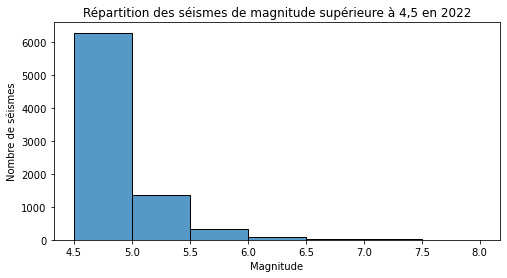

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reindexation car la dataframe possède des lignes avec le même index
# du à la concaténation de deux dataframes
df_seismes.reset_index(drop=True, inplace=True)

# Création de l'histogramme
fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(x='mag', data=df_seismes, bins=[4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8])
plt.xlabel('Magnitude')
plt.ylabel('Nombre de séismes')
plt.title('Répartition des séismes de magnitude supérieure à 4,5 en 2022')
plt.show()

## 3. Création de la carte

Le placement des séismes sur une carte va se faire en créant un nuage de points (scatterplot) sur un fond de carte. Il nous faut donc ce fond de carte du monde. Il est disponible dans le fichier *world_map.json*.

In [10]:
carte=gpd.read_file('world_map.json')
carte.head()

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,filename,geometry
0,Admin-0 country,1,2,Ethiopia,ETH,0,2,Sovereign country,1,Ethiopia,...,None,None,None,None,None,None,None,None,ETH.geojson,"POLYGON ((47.78942 8.00300, 44.96360 5.00162, ..."
1,Admin-0 country,1,3,South Sudan,SDS,0,2,Sovereign country,1,South Sudan,...,None,None,None,None,None,None,None,None,SSD.geojson,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."
2,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,1,Somalia,...,None,None,None,None,None,None,None,None,SOM.geojson,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
3,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,1,Kenya,...,None,None,None,None,None,None,None,None,KEN.geojson,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
4,Admin-0 country,1,6,Malawi,MWI,0,2,Sovereign country,1,Malawi,...,None,None,None,None,None,None,None,None,MWI.geojson,"POLYGON ((32.75938 -9.23060, 33.73972 -9.41715..."


Il existe plusieurs projections de la surface du globe sur un plan. Ici, je vais utiliser la projection Mercator.

In [11]:
carte=carte.to_crs('EPSG:3395') #projection Mercator

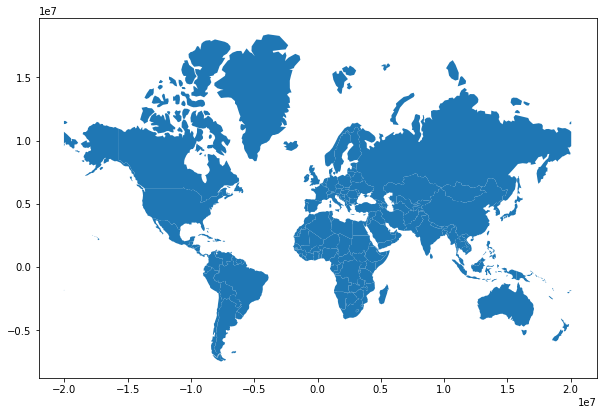

In [12]:
carte.plot(figsize=(10,10))
plt.show()

Comme on peut le voir, nous avons notre fond de carte. Il ne nous reste plus qu'à en modifier l'aspect et représenter les séismes par des disques. Mais pour cela il faut :
- convertir les données géospatiales de *df_seismes* pour avoir le même CRS (projection Mercator)
- récupérer la longitude et la latitude de chaque séisme dans la colonne geometry

In [13]:
# Changement CRS
df_seismes=df_seismes.to_crs('EPSG:3395')
# Création de colonnes correspondant à la latitude et la longitude de chaque seisme
df_seismes['lat']=df_seismes['geometry'].y
df_seismes['long']=df_seismes['geometry'].x

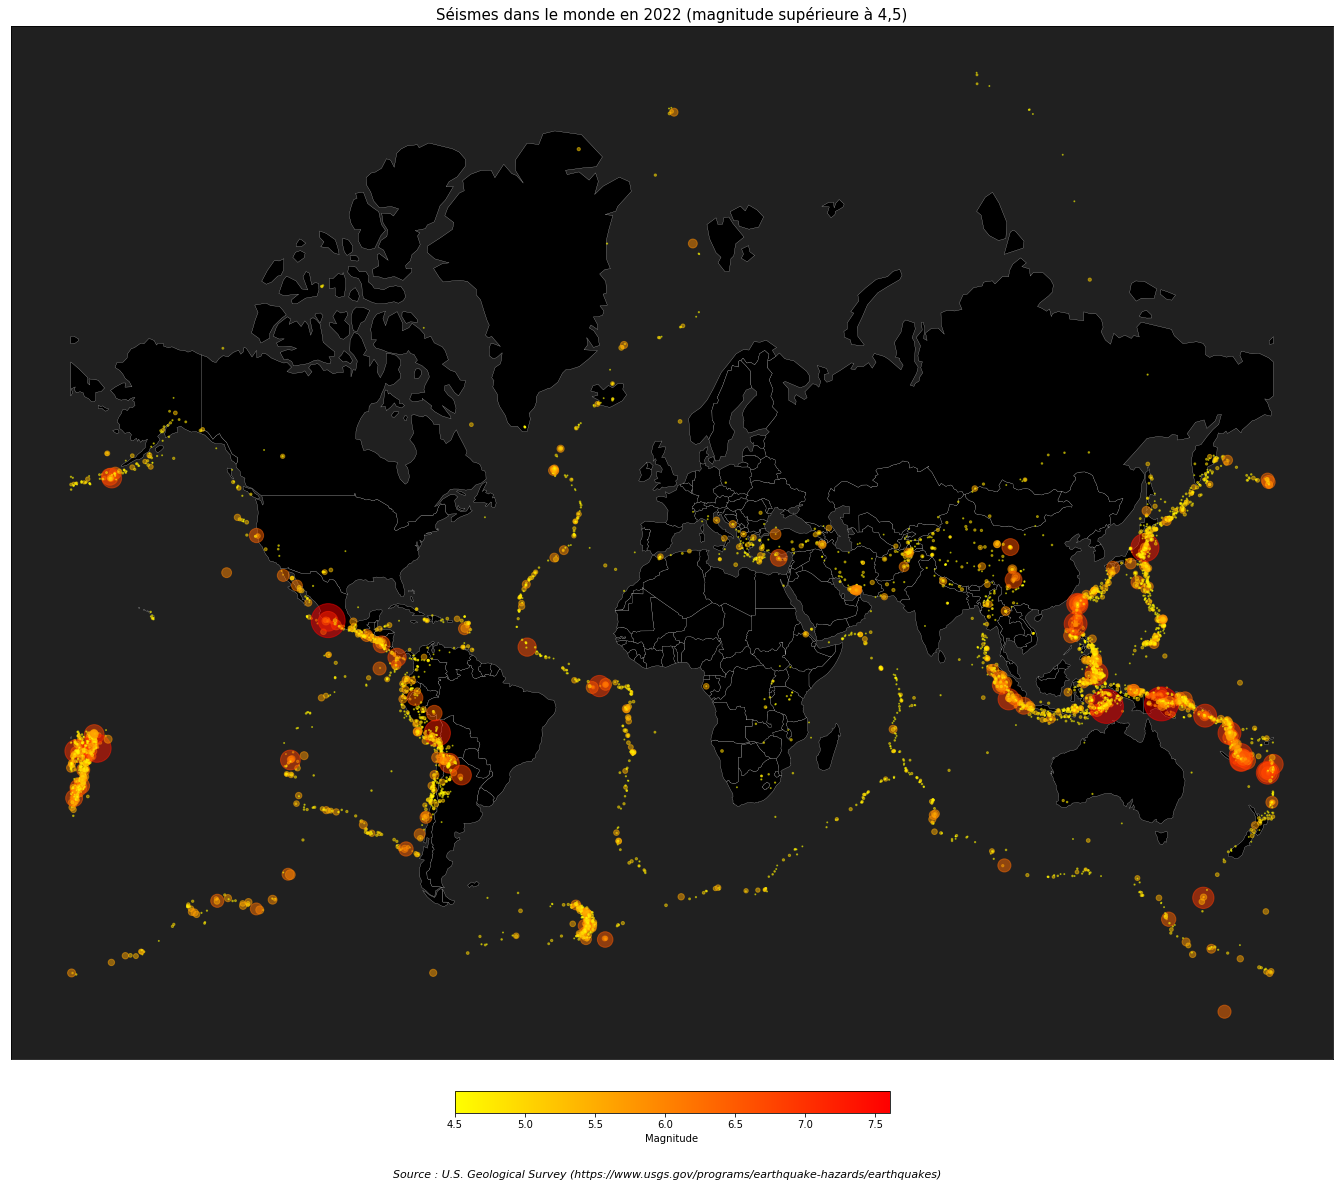

In [14]:
#Création d'une liste de rayons des disques représentant les séismes en fonction de leur magnitude
s=[(mag-3.5)**5 for mag in df_seismes['mag']]

# Création de la carte
fig,ax = plt.subplots(1,1,figsize=(25,20), facecolor='white')
carte_seismes = carte.plot(ax=ax, color="black", edgecolor='white', linewidth=0.2)

# Suppression des axes
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Couleur de fond gris foncé
ax.set_facecolor("#202020")

# Représentation des seismes
ax.scatter(df_seismes['long'],df_seismes['lat'], marker="o", s=s, c=df_seismes['mag'] ,cmap='autumn_r', edgecolors=None, alpha=0.5)
plt.title("Séismes dans le monde en 2022 (magnitude supérieure à 4,5)", fontsize=15)

#Création d'une échelle de couleur pour la légende
sm = plt.cm.ScalarMappable(cmap='autumn_r')
sm.set_clim(vmin=4.5, vmax=7.6)
plt.colorbar(sm, label="Magnitude", fraction=0.02, shrink=0.4, orientation='horizontal',pad=0.03)

# Texte indiquant la source des données
plt.figtext(0.51, 0.08, "Source : U.S. Geological Survey (https://www.usgs.gov/programs/earthquake-hazards/earthquakes)",style='italic', ha="center", fontsize=11, bbox={"facecolor":"white", "edgecolor":"white", "pad":-10})

# Exportation au format png
image=plt.gcf()
image.savefig('seismes', bbox_inches='tight', dpi=200)

#Affichage
plt.show()